#### Configuración

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta = '../data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filepath_or_buffer=ruta,sep=',',header=0)
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 1. Limpieza de datos con Python:

* Identificar y solucionar cualquier valor duplicado.

In [4]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")


Número de registros duplicados: 0


* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [5]:
# creo un diccionario con los tipos de datos
diccionario = df.dtypes.to_dict()
print(diccionario)

{'customerID': dtype('O'), 'gender': dtype('O'), 'SeniorCitizen': dtype('int64'), 'Partner': dtype('O'), 'Dependents': dtype('O'), 'tenure': dtype('int64'), 'PhoneService': dtype('O'), 'MultipleLines': dtype('O'), 'InternetService': dtype('O'), 'OnlineSecurity': dtype('O'), 'OnlineBackup': dtype('O'), 'DeviceProtection': dtype('O'), 'TechSupport': dtype('O'), 'StreamingTV': dtype('O'), 'StreamingMovies': dtype('O'), 'Contract': dtype('O'), 'PaperlessBilling': dtype('O'), 'PaymentMethod': dtype('O'), 'MonthlyCharges': dtype('float64'), 'TotalCharges': dtype('O'), 'Churn': dtype('O')}


In [6]:
# creo una funcion para corregir los tipos de datos
def corregir_tipo():
    for columna, tipo in diccionario.items(): # ciclo para recorrer cada item del diccionario
        # verificamos el tipo de datos actual de la columna en el DataFrame
        tipo_actual = df[columna].dtype
        # comparamos el tipo actual con el tipo esperado
        if tipo_actual != tipo:  # si los tipos no coinciden, procedemos a corregir
            if tipo == 'datetime64[ns]':
                df[columna] = pd.to_datetime(df[columna], errors='coerce')
            elif tipo == 'object':
                df[columna] = df[columna].astype(str)
            else:
                df[columna] = df[columna].astype(tipo)


In [7]:
# verificamos que los tipos antes de llamra a la funcion
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Llamamos a la función
corregir_tipo()

In [9]:
# verificamos que los tipos sean los correctos
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [10]:
# creamos una lista con las columnas categoricas
columnas_categoricas=[ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']
# mostrarlos el contenido de la lista
print(columnas_categoricas)
# hechamos un vistazo a las columnas catagoricas
df[columnas_categoricas].head()

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [11]:
# verificamos los valores unicos de las columnas categoricas
for col in columnas_categoricas: # por medio del ciclo recorremos cada elemento de la lista
    print(col) # mostramos el titulo de cada columna
    print(df[col].unique()) # mostramos los valores uhicos
    print("") # esto solo puse para que agrege un espacio en blanco a fin de separar las categorias

gender
['Female' 'Male']

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']



In [12]:
# creamos la funcion para limpiar las cadenas, le pasamos el parametro (cadena)
def limpiar_cadena(cadena):
    # eliminarmos espacios en blanco iniciales y finales
    # convertimos a mayuscula inicial con la funcion capitalize()
    # por medio de if isinstance indicamos si se aplica o no la funcion si la cadena, 
    #  la condicion es que debe ser una cadena, de lo contrario solo devolvermos el mismo valor de cadena
    # es decir, sin cambios
    resultado = cadena.strip().capitalize() if isinstance(cadena, str) else cadena
    resultado=resultado.replace('/','').replace('-','').replace('*','').replace('#','')
    # el resultado obtenido lo devolvemos
    return resultado

In [13]:
# prueba de que la funcion realiza lo esperado
ejemplo=' pRObaMoS que -/#*funcioNE '
ejemplo=limpiar_cadena(ejemplo)
print(ejemplo)

Probamos que funcione


In [14]:
# Hacemos un recorrico de la lista para aplicar la funcion a las columnas categoricas
for col in columnas_categoricas:
    df[col] = df[col].apply(limpiar_cadena) # aplicamos los cambios sobre la columna de categorias

In [15]:
# verificamos para ver si se modificaron
for col in columnas_categoricas:
    print(col) #mostramos nombre de la columna
    print(df[col].unique()) # mostramos la lista unica de valores
    print("-----------------------") # separamos con - apra darle mejor apariencia

gender
['Female' 'Male']
-----------------------
Partner
['Yes' 'No']
-----------------------
Dependents
['No' 'Yes']
-----------------------
PhoneService
['No' 'Yes']
-----------------------
MultipleLines
['No phone service' 'No' 'Yes']
-----------------------
InternetService
['Dsl' 'Fiber optic' 'No']
-----------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
-----------------------
OnlineBackup
['Yes' 'No' 'No internet service']
-----------------------
DeviceProtection
['No' 'Yes' 'No internet service']
-----------------------
TechSupport
['No' 'Yes' 'No internet service']
-----------------------
StreamingTV
['No' 'Yes' 'No internet service']
-----------------------
StreamingMovies
['No' 'Yes' 'No internet service']
-----------------------
Contract
['Monthtomonth' 'One year' 'Two year']
-----------------------
PaperlessBilling
['Yes' 'No']
-----------------------
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
-

* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

In [16]:
# Veriricamos si existen valores faltantes
sin_nulos = df.shape[0] - df.isnull().sum()
nulos = df.isnull().sum()
porcentaje = round(100* df.isnull().sum() /df.shape[0],2)

diccionario_nulos = {'Sin valores nulos':sin_nulos,'Valores nulos':nulos,'porcentaje':porcentaje}
df_info = pd.DataFrame(data=diccionario_nulos)
df_info.sort_values(by='porcentaje', ascending=False)

,Sin valores nulos,Valores nulos,porcentaje
customerID,7043,0,0.0
DeviceProtection,7043,0,0.0
TotalCharges,7043,0,0.0
MonthlyCharges,7043,0,0.0
PaymentMethod,7043,0,0.0
PaperlessBilling,7043,0,0.0
Contract,7043,0,0.0
StreamingMovies,7043,0,0.0
StreamingTV,7043,0,0.0
TechSupport,7043,0,0.0


no existen valores faltantes por lo que no realizamos ninguna acción

* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
# creamos una lista de valores numericos
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Mostramos el contenido de las lista
print(columnas_numericas)
''' 
lo hago de esta manera para obtimizar la busqueda
'''

['SeniorCitizen', 'tenure', 'MonthlyCharges']


' \nlo hago de esta manera para obtimizar la busqueda\n'

In [19]:
for col in columnas_numericas: # recorremos las columnas numericas con el ciclo for
    print(df.loc[df[col] < 0,col]) # tratams de encontrar valores negativos en las columnas numericas

Series([], Name: SeniorCitizen, dtype: int64)
Series([], Name: tenure, dtype: int64)
Series([], Name: MonthlyCharges, dtype: float64)


Traducción de cada elemento
* ArithmeticErrorcustomerID: ID del cliente
* gender: Género
* SeniorCitizen: Ciudadano mayor
* Partner: Pareja
* Dependents: Dependientes
* tenure: Antigüedad
* PhoneService: Servicio telefónico
* MultipleLines: Líneas múltiples
* InternetService: Servicio de Internet
* OnlineSecurity: Seguridad en línea
* OnlineBackup: Respaldo en línea
* DeviceProtection: Protección de dispositivos
* TechSupport: Soporte técnico
* StreamingTV: Streaming de TV
* StreamingMovies: Streaming de películas
* Contract: Contrato
* PaperlessBilling: Facturación sin papel
* PaymentMethod: Método de pago
* MonthlyCharges: Cargos mensuales
* TotalCharges: Cargos totales
* Churn: Deserción (o tasa de cancelación)

In [20]:
# No se han detectado datos que puedan contener valores inapropiados

### 2. Exploración de datos con Python:

* Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


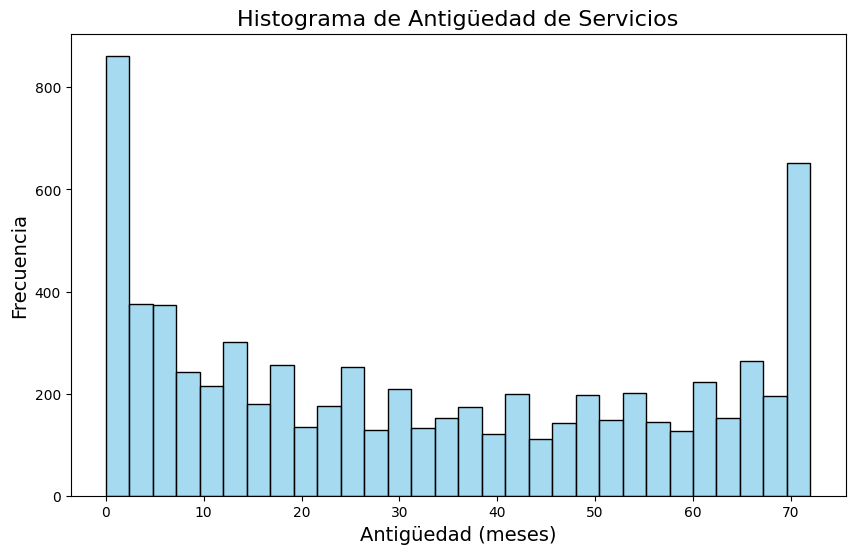

'\nInterpretación: \n    * Un alto número de clientes con poca antigüedad puede sugerir que muchos nuevos clientes \n    se han suscrito recientemente y podria deberse a una campaña de marketing exitosa o \n    simplemente que el servicio es atractivo para nuevos clientes.\n    \n    * La curva del medio podría indicar que ciertos clientes no encontraron valor suficiente\n    en el servicio a medio plazo y decidieron cancelarlo.\n\n    * Un aumento al final puede significar que algunos clientes han permanecido leales \n    durante un largo período, podrìa indicar que estan satisfechos con el servicio \n    o beneficios a largo plazo, tambien sugi que la empresa ha logrado mantener a sus clientes.\n    \n    Se puede decir que se ha logrado mejorar los nuevos servicios que logran convencer a los clientes\n    para mantenerse fieles\n'

In [22]:
# Filtrar los valores no nulos de 'tenure'
antiguedad = df['tenure'].dropna()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))
# Crear el histograma usando seaborn
sns.histplot(antiguedad, bins=30, kde=False, color='skyblue')
# Añadir títulos y etiquetas
plt.title('Histograma de Antigüedad de Servicios', fontsize=16)
plt.xlabel('Antigüedad (meses)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show() # Mostrar el gráfico

'''
Interpretación: 
    * Un alto número de clientes con poca antigüedad puede sugerir que muchos nuevos clientes 
    se han suscrito recientemente y podria deberse a una campaña de marketing exitosa o 
    simplemente que el servicio es atractivo para nuevos clientes.
    
    * La curva del medio podría indicar que ciertos clientes no encontraron valor suficiente
    en el servicio a medio plazo y decidieron cancelarlo.

    * Un aumento al final puede significar que algunos clientes han permanecido leales 
    durante un largo período, podrìa indicar que estan satisfechos con el servicio 
    o beneficios a largo plazo, tambien sugi que la empresa ha logrado mantener a sus clientes.
    
    Se puede decir que se ha logrado mejorar los nuevos servicios que logran convencer a los clientes
    para mantenerse fieles
'''

Se observa que la la antiguedad de los servicios se distribuye de manera casi homogenea, variando en frecuencia los mñas antiguos y los nuevos

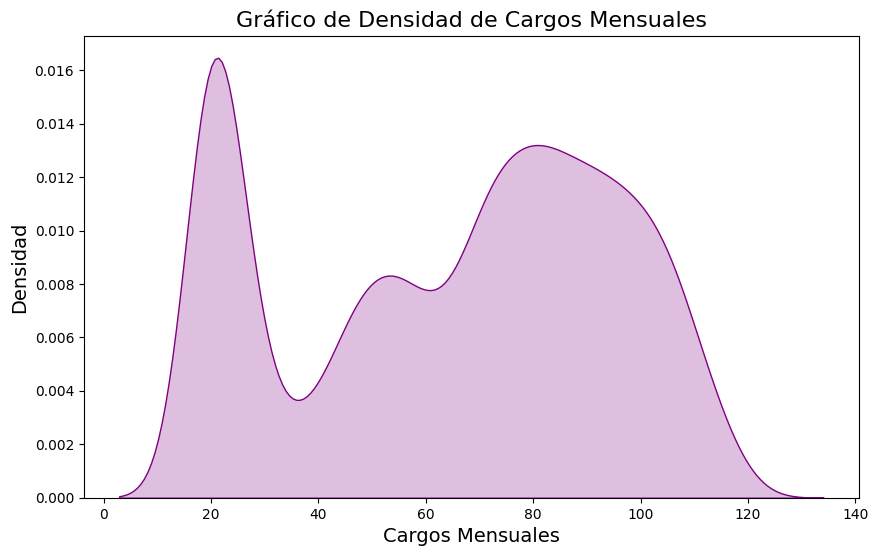

'\nInterpretación:\n    Podriamos considerar que hay variables importantes que hacen que los cargos aumenten, como\n    una promocion en productos, o alguna oferta atractiva.\n    Tambien podemos observar que para ciertos cargos hay una variacion significativa y esto puede deberse\n    nuevamente a algun tipo de oferta o promoción segun el cargo, o un mejor servicio.\n'

In [23]:
# obtenemos la lista de cargos mensuales
cargos = df['MonthlyCharges'] # aliminamos filas nulas para mayr seguridad
#generamos la figura
plt.figure(figsize=(10, 6))
sns.kdeplot(cargos, color='purple', fill=True) # pasamos los parametros a seaborn
# Asignamos los titulos y etiquetas
plt.title('Gráfico de Densidad de Cargos Mensuales', fontsize=16) 
plt.xlabel('Cargos Mensuales', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show() # mostramos el grafico

'''
Interpretación:
    Podriamos considerar que hay variables importantes que hacen que los cargos aumenten, como
    una promocion en productos, o alguna oferta atractiva.
    Tambien podemos observar que para ciertos cargos hay una variacion significativa y esto puede deberse
    nuevamente a algun tipo de oferta o promoción segun el cargo, o un mejor servicio.
'''

* Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

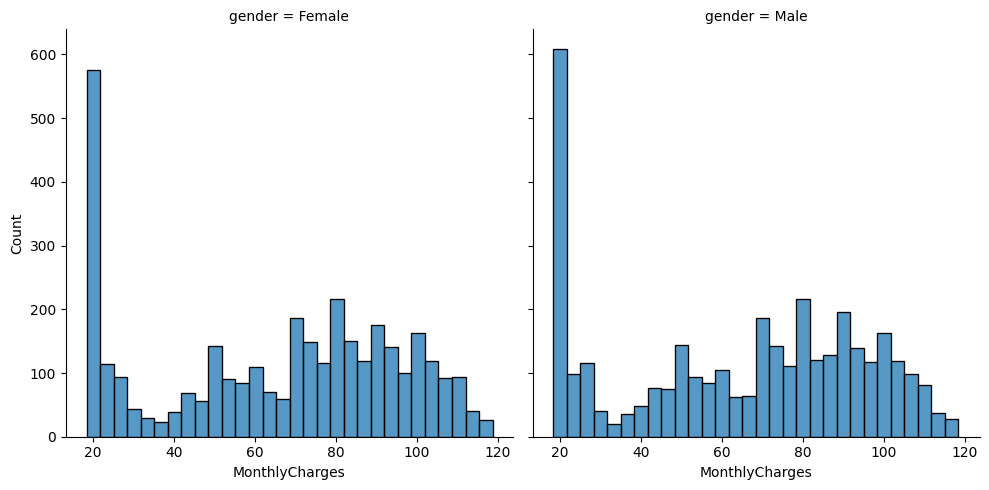

In [24]:
g = sns.FacetGrid(df, col="gender", height=5)
g.map(sns.histplot, "MonthlyCharges", bins=30)
plt.show()

# según el gráfico vemos que existe una distribucino homogenea entre hombres y mujeres
#  en cuanto a los cargos mensuales, esto puede deberse a que los servicios ofrecidos 
#  tienen los mismos beneficios para ambos generos

In [25]:
df[columnas_categoricas] # hechamos un vistado a las columnas categoricas

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,Dsl,No,Yes,No,No,No,No,Monthtomonth,Yes,Electronic check
1,Male,No,No,Yes,No,Dsl,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,Dsl,Yes,Yes,No,No,No,No,Monthtomonth,Yes,Mailed check
3,Male,No,No,No,No phone service,Dsl,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Monthtomonth,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,Dsl,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,Dsl,Yes,No,No,No,No,No,Monthtomonth,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Monthtomonth,Yes,Mailed check


/tmp/ipykernel_27133/3770808653.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PaymentMethod', y='tenure', data=df_box_console_critic, palette='Set2')


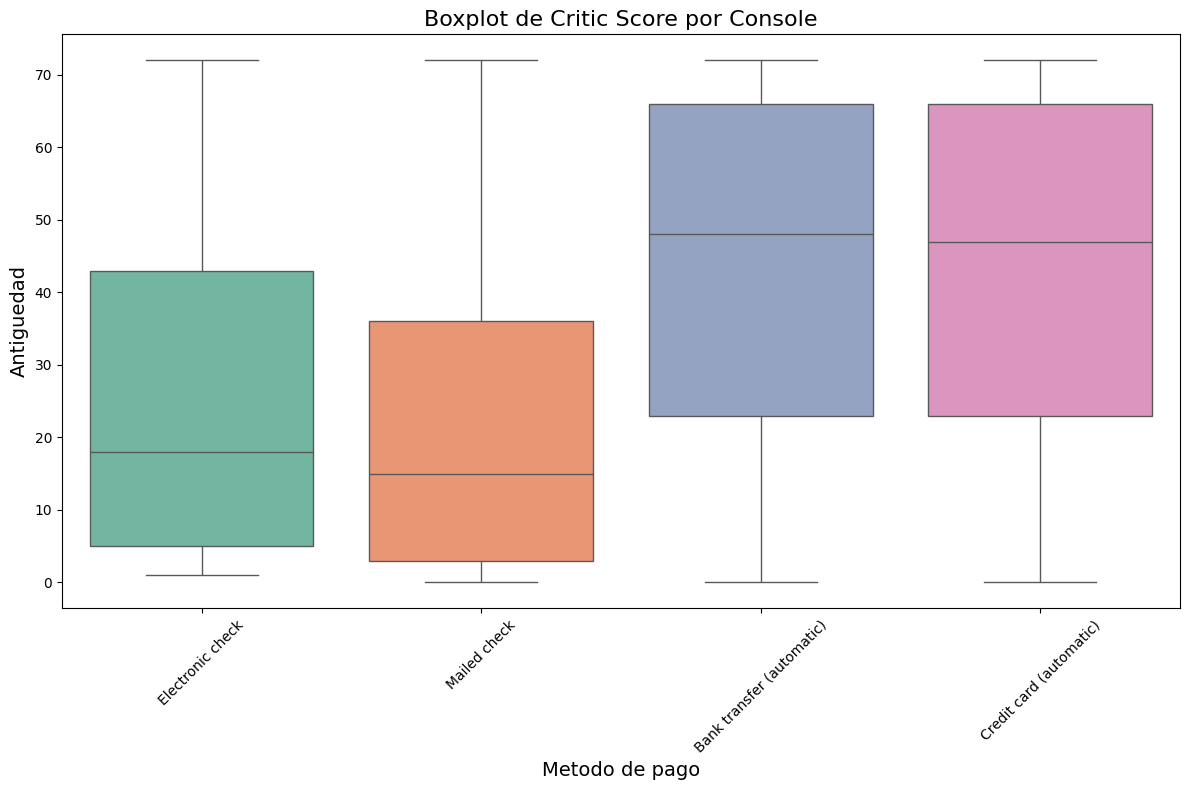

'\nInterpretación: \n    Según se observa, hay una preferencia de pago de por medio de tarjetas de crédito \n    y/o transferencias bancarias, especialmente para los que tienen una mayor antiguedad\n    mientras que los de menor antiguedad prefieren cheques electónicos y por correo\n'

In [26]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_box_console_critic = df[['PaymentMethod', 'tenure']].dropna()
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))
# Crear el boxplot usando seaborn
sns.boxplot(x='PaymentMethod', y='tenure', data=df_box_console_critic, palette='Set2')
# Añadir títulos y etiquetas
plt.title('Boxplot de Critic Score por Console', fontsize=16)
plt.xlabel('Metodo de pago', fontsize=14)
plt.ylabel('Antiguedad', fontsize=14)
# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

'''
Interpretación: 
    Según se observa, hay una preferencia de pago de por medio de tarjetas de crédito 
    y/o transferencias bancarias, especialmente para los que tienen una mayor antiguedad
    mientras que los de menor antiguedad prefieren cheques electónicos y por correo
'''